### Dataset & Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

df = pd.read_csv('data/heart_cleveland_upload.csv')

In [2]:
df1=df.copy() ##Create Copy

# EDA

In [3]:
df1.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [4]:
df1.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


### Null Values

In [6]:
nv = df1.isnull().sum()

print("Number of null values:")
print(nv)

Number of null values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


### Missing Values

In [7]:
mv = df1.isna().sum()

print("Number of missing values:")
print(mv)

Number of missing values:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64


### Renaming Columns

In [8]:
df1.columns = ['age', 'sex', 'chest_pain_type', 
               'resting_blood_pressure','cholesterol','fasting_blood_sugar', 
               'rest_ecg', 'max_heart_rate_achieved','exercise_induced_angina', 
               'st_depression', 'st_slope', 'num_major_vessels', 
               'thalassemia', 'condition']

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      297 non-null    int64  
 1   sex                      297 non-null    int64  
 2   chest_pain_type          297 non-null    int64  
 3   resting_blood_pressure   297 non-null    int64  
 4   cholesterol              297 non-null    int64  
 5   fasting_blood_sugar      297 non-null    int64  
 6   rest_ecg                 297 non-null    int64  
 7   max_heart_rate_achieved  297 non-null    int64  
 8   exercise_induced_angina  297 non-null    int64  
 9   st_depression            297 non-null    float64
 10  st_slope                 297 non-null    int64  
 11  num_major_vessels        297 non-null    int64  
 12  thalassemia              297 non-null    int64  
 13  condition                297 non-null    int64  
dtypes: float64(1), int64(13)
m

In [9]:
pd.options.mode.chained_assignment = None
df1['sex'][df1['sex'] == 0] = 'Female'
df1['sex'][df1['sex'] == 1] = 'Male' 

df1['chest_pain_type'][df1['chest_pain_type'] == 0] = 'Typical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 1] = 'Atypical angina'
df1['chest_pain_type'][df1['chest_pain_type'] == 2] = 'Non-anginal pain'
df1['chest_pain_type'][df1['chest_pain_type'] == 3] = 'Asymptomatic'

df1['fasting_blood_sugar'][df1['fasting_blood_sugar'] == 0] = 'Lower than 120mg/ml'
df1['fasting_blood_sugar'][df1['fasting_blood_sugar'] == 1] = 'Greater than 120mg/ml'

df1['rest_ecg'][df1['rest_ecg'] == 0] = 'Normal'
df1['rest_ecg'][df1['rest_ecg'] == 1] = 'ST-T wave abnormality'
df1['rest_ecg'][df1['rest_ecg'] == 2] = 'Left ventricular hypertrophy'

df1['exercise_induced_angina'][df1['exercise_induced_angina'] == 0] = 'No'
df1['exercise_induced_angina'][df1['exercise_induced_angina'] == 1] = 'Yes'

df1['st_slope'][df1['st_slope'] == 0] = 'Upsloping'
df1['st_slope'][df1['st_slope'] == 1] = 'Flat'
df1['st_slope'][df1['st_slope'] == 2] = 'Downsloping'

df1['thalassemia'][df1['thalassemia'] == 0] = 'Normal'
df1['thalassemia'][df1['thalassemia'] == 1] = 'Fixed defect'
df1['thalassemia'][df1['thalassemia'] == 2] = 'Reversable defect'

df1['condition'][df1['condition'] == 0] = 'No'
df1['condition'][df1['condition'] == 1] = 'Yes'

In [10]:
df1.head(10)

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,condition
0,69,Male,Typical angina,160,234,Greater than 120mg/ml,Left ventricular hypertrophy,131,No,0.1,Flat,1,Normal,No
1,69,Female,Typical angina,140,239,Lower than 120mg/ml,Normal,151,No,1.8,Upsloping,2,Normal,No
2,66,Female,Typical angina,150,226,Lower than 120mg/ml,Normal,114,No,2.6,Downsloping,0,Normal,No
3,65,Male,Typical angina,138,282,Greater than 120mg/ml,Left ventricular hypertrophy,174,No,1.4,Flat,1,Normal,Yes
4,64,Male,Typical angina,110,211,Lower than 120mg/ml,Left ventricular hypertrophy,144,Yes,1.8,Flat,0,Normal,No
5,64,Male,Typical angina,170,227,Lower than 120mg/ml,Left ventricular hypertrophy,155,No,0.6,Flat,0,Reversable defect,No
6,63,Male,Typical angina,145,233,Greater than 120mg/ml,Left ventricular hypertrophy,150,No,2.3,Downsloping,0,Fixed defect,No
7,61,Male,Typical angina,134,234,Lower than 120mg/ml,Normal,145,No,2.6,Flat,2,Normal,Yes
8,60,Female,Typical angina,150,240,Lower than 120mg/ml,Normal,171,No,0.9,Upsloping,0,Normal,No
9,59,Male,Typical angina,178,270,Lower than 120mg/ml,Left ventricular hypertrophy,145,No,4.2,Downsloping,0,Reversable defect,No


### Distribution graph of target variable (condition)

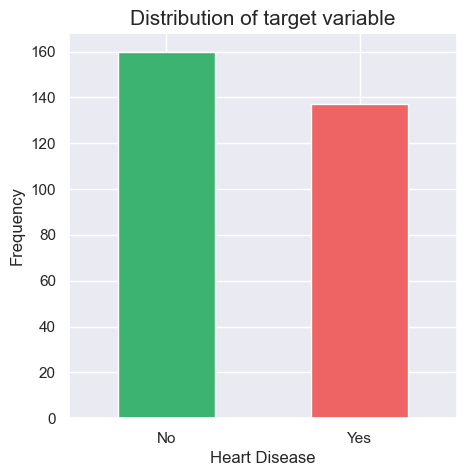

In [11]:
sns.set(style="darkgrid")

df1.condition.value_counts().plot(kind="bar",figsize=(5,5),color=['#3CB371','#EE6363'])
plt.title('Distribution of target variable',fontsize=15)
plt.xlabel('Heart Disease',fontsize=12)
plt.ylabel('Frequency',fontsize=12)
plt.xticks(rotation=0)
plt.show()

In [12]:
countNoDisease = len(df1[df1.condition == "No"])
countHaveDisease = len(df1[df1.condition == "Yes"])
print("Number of Patients do not have Heart Disease:", countNoDisease)
print("Number of Patients have Heart Disease:", countHaveDisease)
print("---------------------------------------")
print("Percentage of Patients do not have Heart Disease: {:.2f}%".format((countNoDisease / (len(df1.condition)) * 100)))
print("Percentage of Patients have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df1.condition)) * 100)))

Number of Patients do not have Heart Disease: 160
Number of Patients have Heart Disease: 137
---------------------------------------
Percentage of Patients do not have Heart Disease: 53.87%
Percentage of Patients have Heart Disease: 46.13%


### Heart Disease against Patient Sex

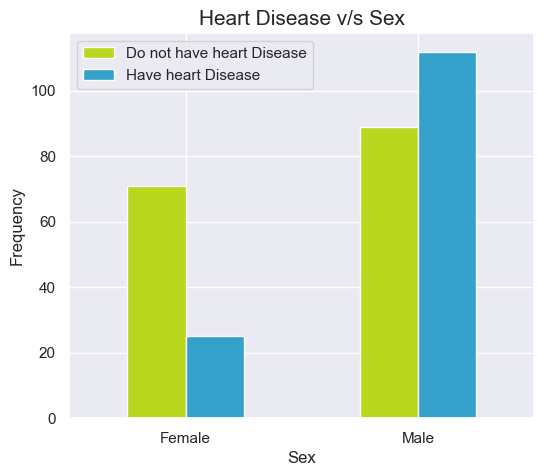

In [13]:
sns.set(style="darkgrid")

pd.crosstab(df1.sex,df1.condition).plot(kind="bar",figsize=(6,5),color=['#BAD720',"#33A1C9"])
plt.title('Heart Disease v/s Sex',fontsize=15)
plt.xlabel('Sex',fontsize=12)
plt.xticks(rotation=0)
plt.legend(["Do not have heart Disease", "Have heart Disease"])
plt.ylabel('Frequency',fontsize=12)
plt.show()

### Heart Disease against Slope

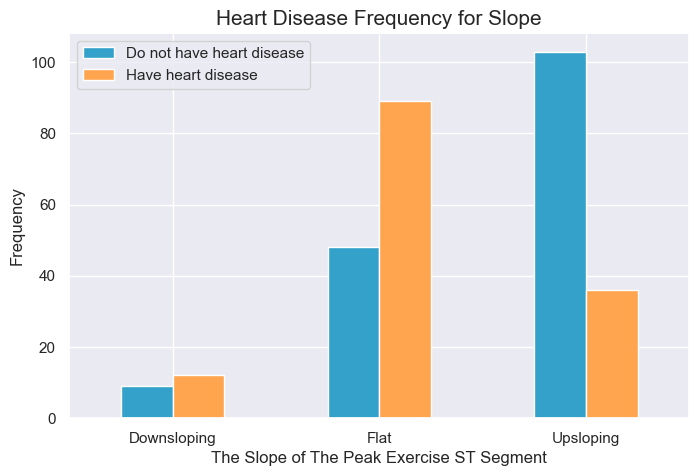

In [14]:
sns.set(style="darkgrid")

pd.crosstab(df1.st_slope, df1.condition).plot(kind="bar", figsize=(8,5), color=["#33A1C9", "#FFA54F"], ax=plt.gca())
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.title("Heart Disease Frequency for Slope",fontsize=15)
plt.xlabel("The Slope of The Peak Exercise ST Segment",fontsize=12)
plt.xticks(rotation=0)
plt.gca().set_xticklabels(labels=["Downsloping","Flat","Upsloping"])
plt.ylabel("Frequency",fontsize=12)
plt.show()

### Heart Disease against Fasting Blood Sugar

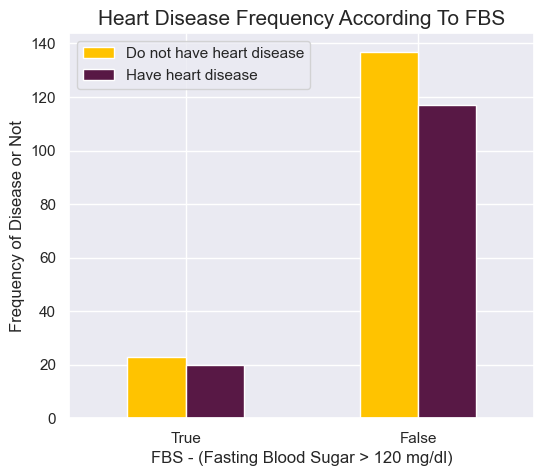

In [15]:
sns.set(style="darkgrid")

pd.crosstab(df1.fasting_blood_sugar, df1.condition).plot(
    kind="bar", figsize=(6,5), color=["#FFC300", "#581845"], ax=plt.gca()
)
plt.title("Heart Disease Frequency According To FBS",fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("FBS - (Fasting Blood Sugar > 120 mg/dl)",fontsize=12)
plt.gca().set_xticklabels(labels=["True", "False"])
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
plt.show()

### Heart Disease against Chest Pain Type

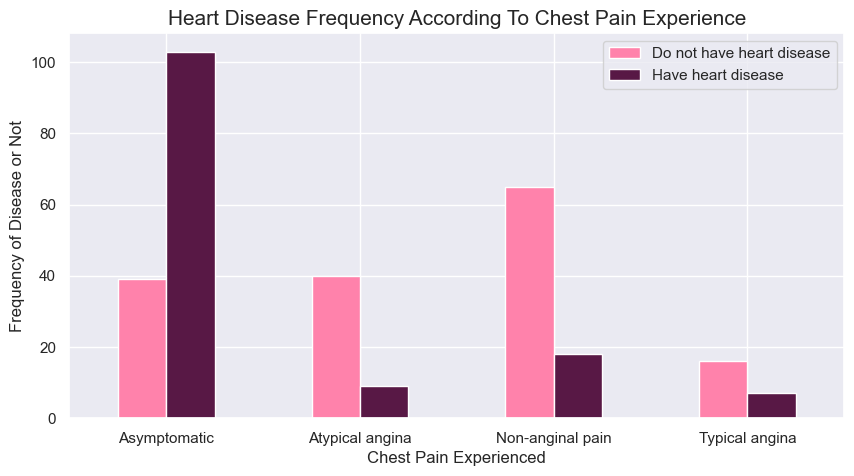

In [16]:
sns.set(style="darkgrid")

pd.crosstab(df1.chest_pain_type, df1.condition).plot(
    kind="bar", figsize=(10, 5), color=["#FF82AB", "#581845"], ax=plt.gca()
)
plt.title("Heart Disease Frequency According To Chest Pain Experience",fontsize=15)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Chest Pain Experienced",fontsize=12)
plt.gca().set_xticklabels(
    labels=["Asymptomatic","Atypical angina","Non-anginal pain","Typical angina"]
)
plt.xticks(rotation=0)
plt.ylabel("Frequency of Disease or Not",fontsize=12)
plt.show()

### Heart Rate against Age Categorized by Heart Disease presence

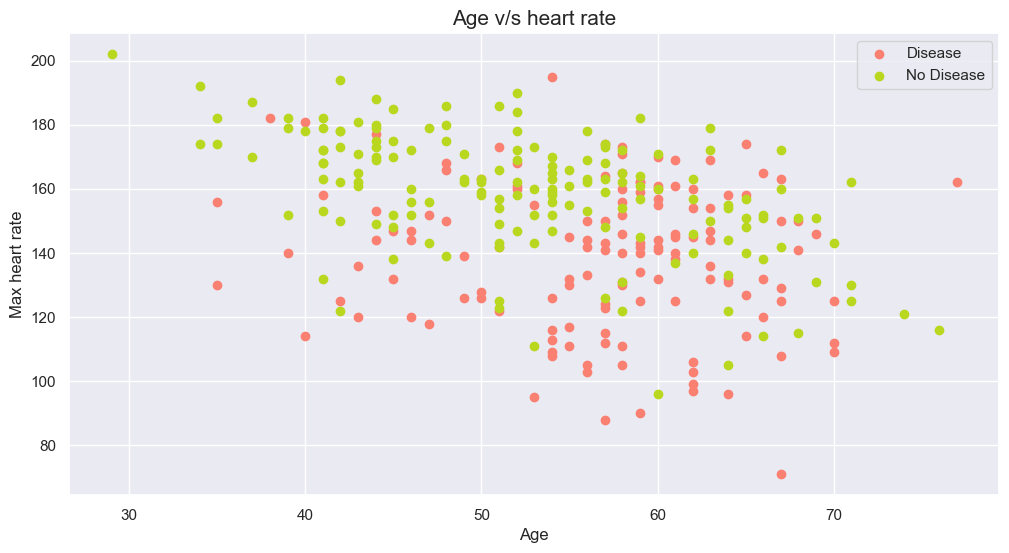

In [17]:
sns.set(style="darkgrid")

plt.figure(figsize=(12,6))

plt.scatter(df1.age[df1.condition=='Yes'], 
            df1.max_heart_rate_achieved[df1.condition=='Yes'],color='salmon')
plt.scatter(df1.age[df1.condition=='No'], 
            df1.max_heart_rate_achieved[df1.condition=='No'],color='#BAD720')

plt.title('Age v/s heart rate',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Max heart rate',fontsize=12)
plt.legend(['Disease','No Disease']);

### Cholesterol Level against Age categorized by Heart Disease presence

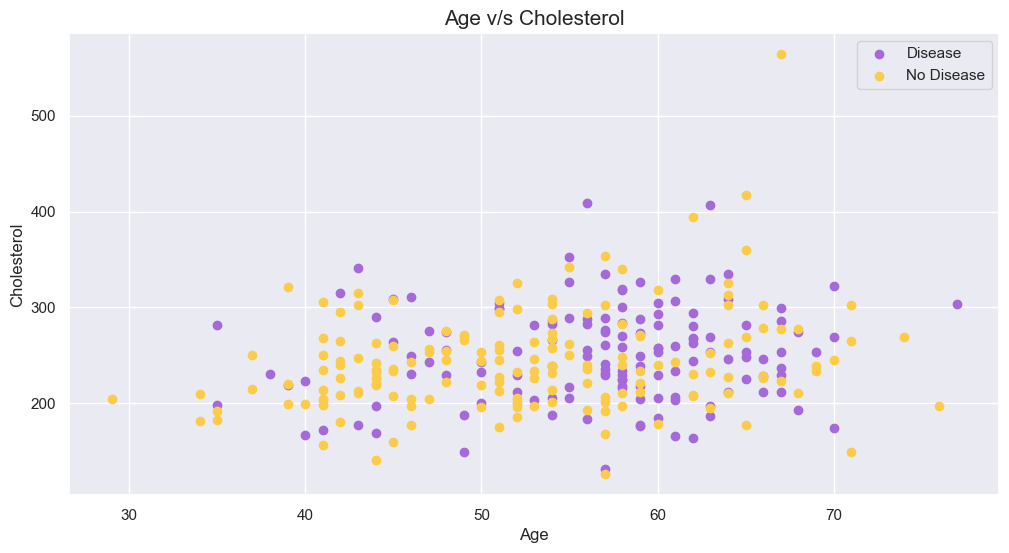

In [18]:
sns.set(style="darkgrid")

plt.figure(figsize=(12,6))

plt.scatter(df1.age[df1.condition=='Yes'], 
            df1.cholesterol[df1.condition=='Yes'],color='#A569DA')
plt.scatter(df1.age[df1.condition=='No'], 
            df1.cholesterol[df1.condition=='No'],color='#FCCC49')

plt.title('Age v/s Cholesterol',fontsize=15)
plt.xlabel('Age',fontsize=12)
plt.ylabel('Cholesterol',fontsize=12)
plt.legend(['Disease','No Disease']);

### Heart Disease frequency against Age

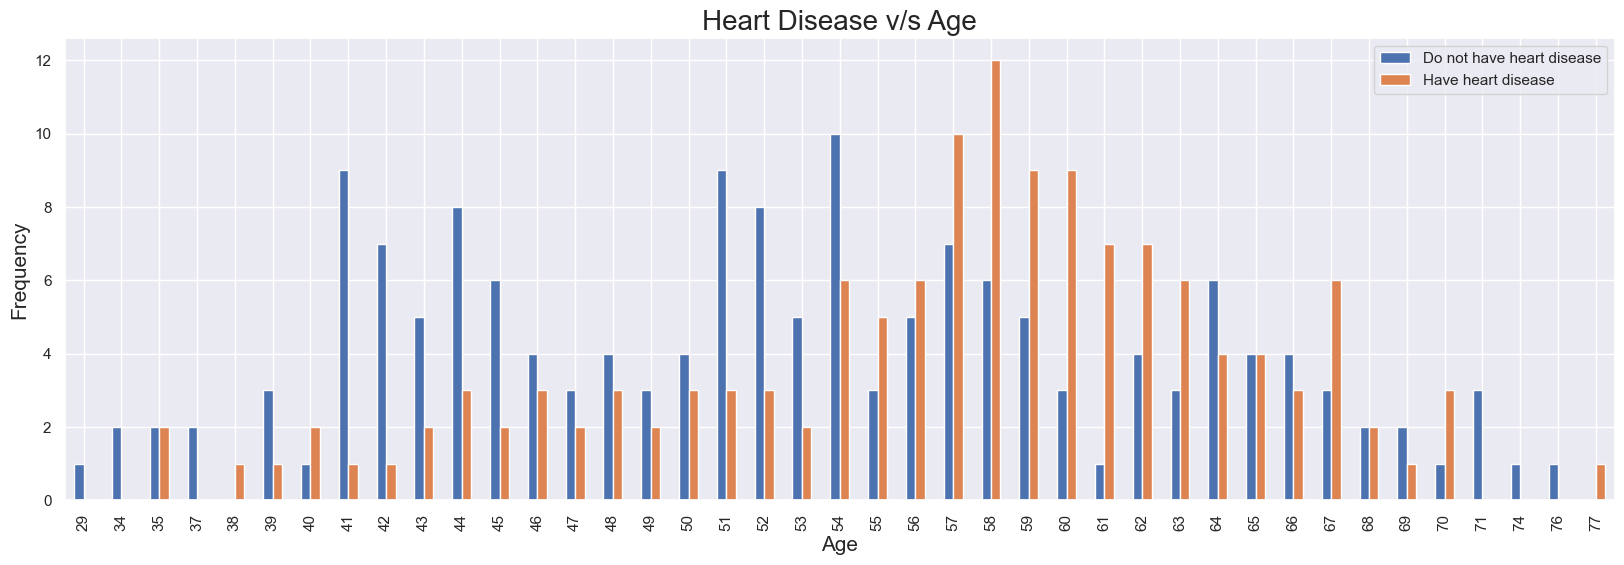

In [19]:
sns.set(style="darkgrid")

pd.crosstab(df1.age, df1.condition).plot(kind="bar", figsize=(20, 6), ax=plt.gca())
plt.title("Heart Disease v/s Age",fontsize=20)
plt.legend(["Do not have heart disease", "Have heart disease"])
plt.xlabel("Age",fontsize=15)
plt.ylabel("Frequency",fontsize=15)
plt.show()

### Correlation Heatmap

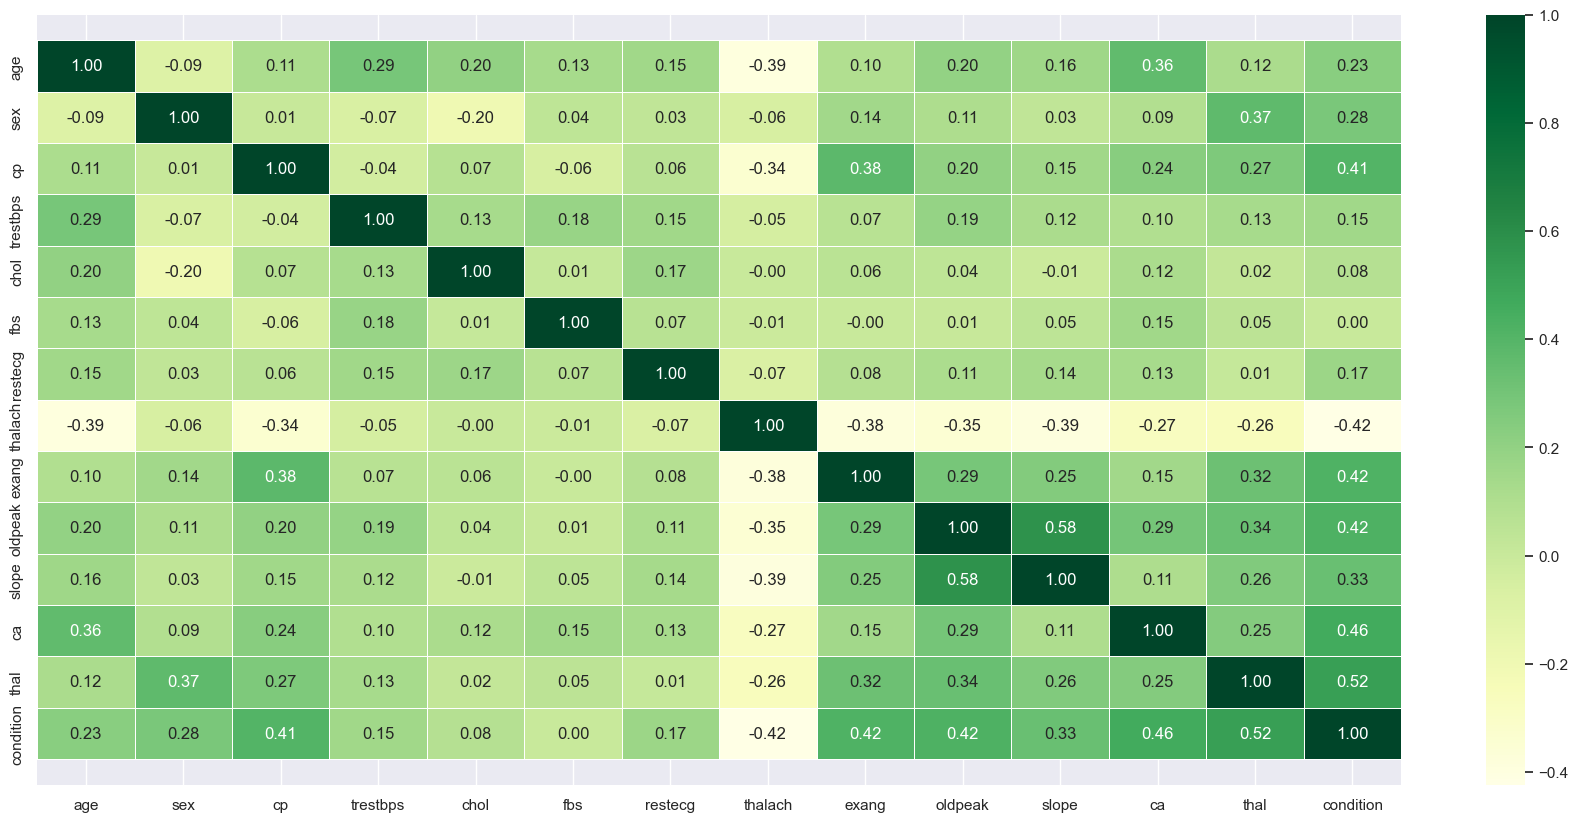

In [20]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(22, 10))
ax = sns.heatmap(corr,annot=True,linewidths=0.5,fmt=".2f",cmap="YlGn");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

### Correlation with Target

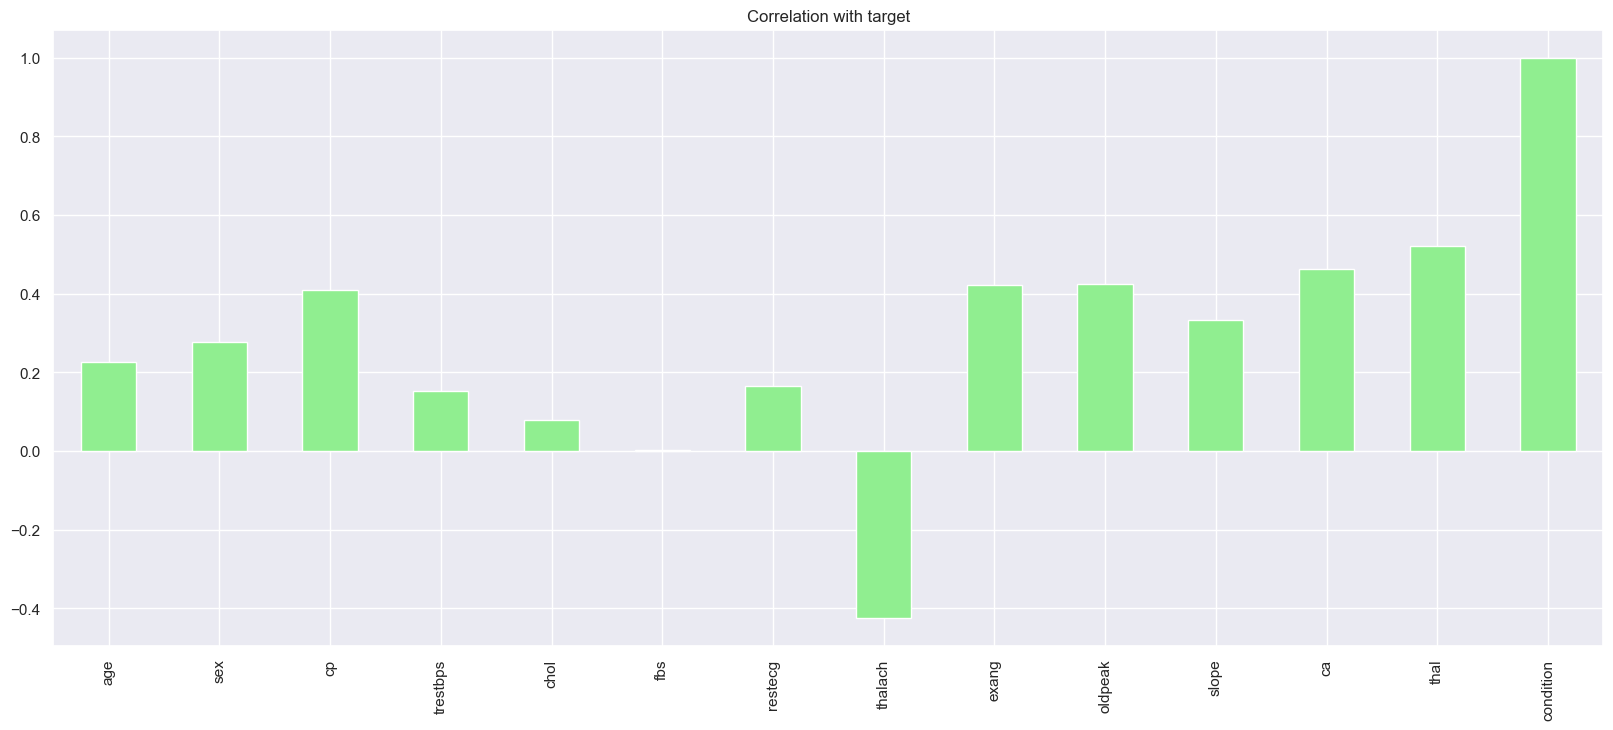

In [21]:


df.corrwith(df.condition).plot(kind='bar', 
                               grid=True,
                               figsize=(20, 8),
                               title="Correlation with target",
                               color="lightgreen");



### Boxplot to check outliers

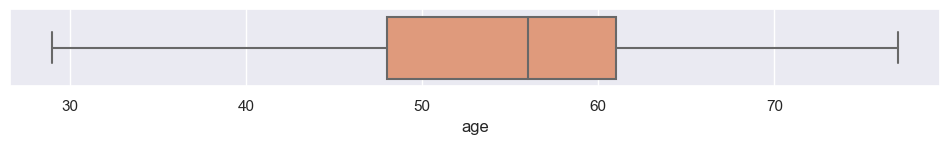

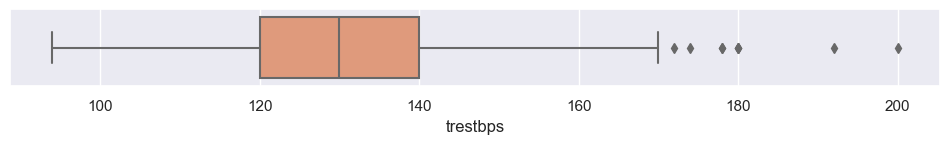

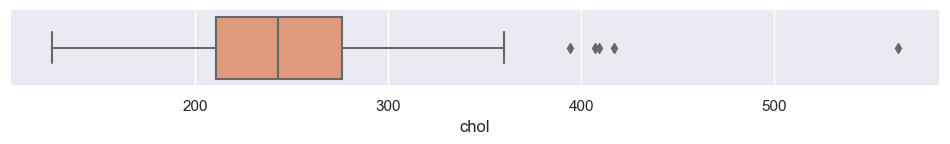

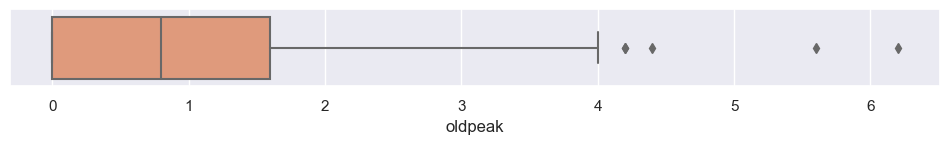

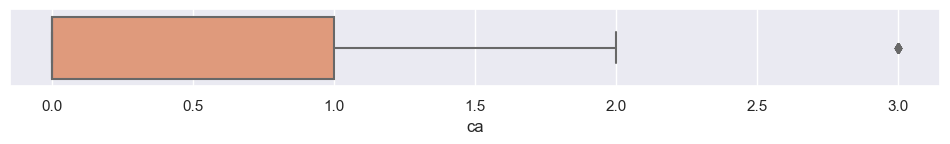

In [22]:
df2=df[['age','trestbps','chol','oldpeak','ca']]

for column in df2:
        plt.figure(figsize=(12,1))
        sns.boxplot(data=df2, x=column, color='#EF946C')

### Histograms

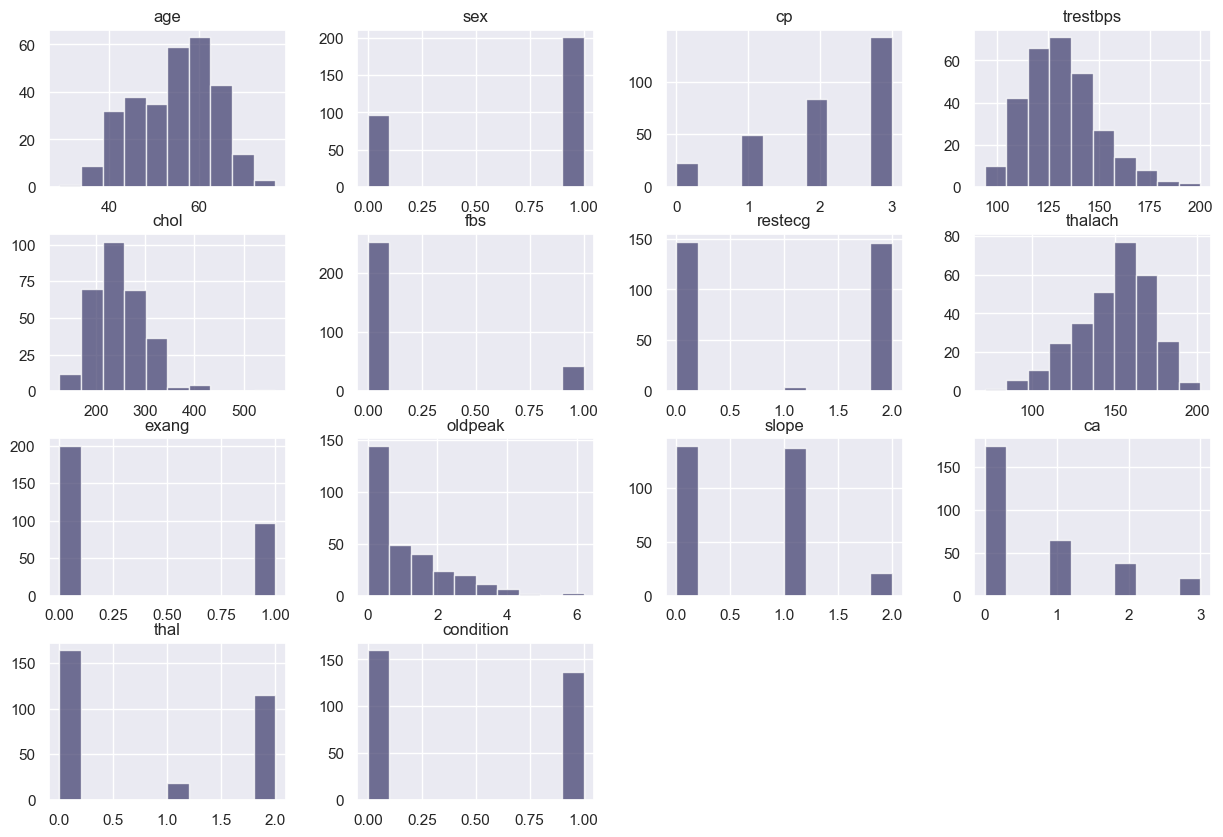

In [23]:
sns.set(style="darkgrid")
df.hist(bins=10,figsize=(15,10) ,color = '#454372', alpha = 0.75)
plt.show()

## Preprocessing
### Removing Outliers

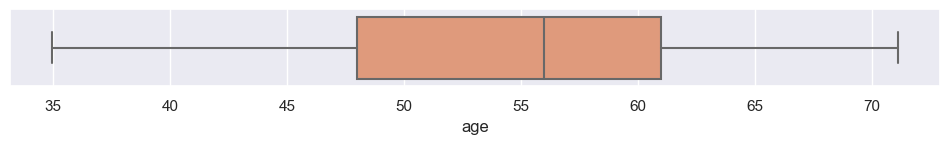

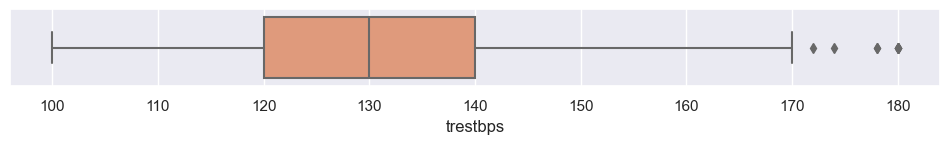

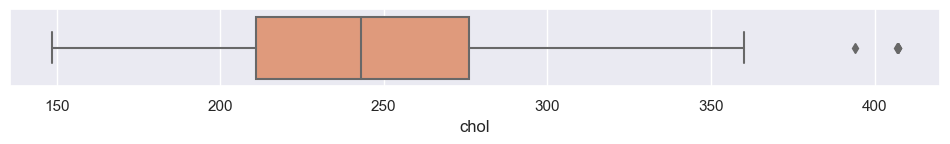

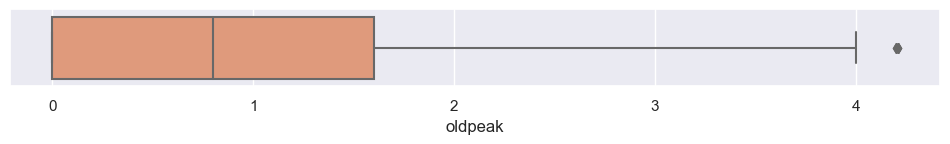

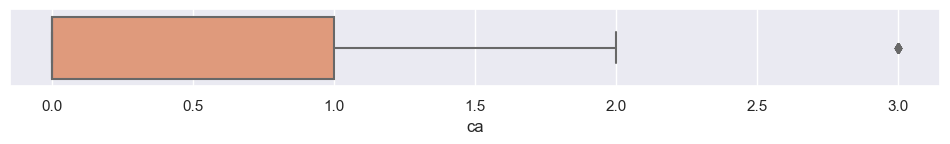

In [24]:
df = df.apply(lambda x: x.clip(lower = x.quantile(0.01),upper = x.quantile(0.99)))

#Plotting box plot to check if outliers were removed
df2=df[['age','trestbps','chol','oldpeak','ca']]

for column in df2:
        plt.figure(figsize=(12,1))
        sns.boxplot(data=df2, x=column, color='#EF946C')

### One Hot Encoding for categorical variables

In [25]:
a = pd.get_dummies(df["cp"], prefix="cp",drop_first=True)
b = pd.get_dummies(df["thal"], prefix="thal",drop_first=True)
c = pd.get_dummies(df["slope"], prefix="slope",drop_first=True)
d = pd.get_dummies(df["ca"], prefix="ca",drop_first=True)
e = pd.get_dummies(df["restecg"], prefix="restecg",drop_first=True)

In [26]:
frames = [df, a, b, c, d, e]
df = pd.concat(frames, axis=1)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_3,thal_1,thal_2,slope_1,slope_2,ca_1,ca_2,ca_3,restecg_1,restecg_2
0,69.0,1,0,160,234.0,1,2,131.0,0,0.1,...,0,0,0,1,0,1,0,0,0,1
1,69.0,0,0,140,239.0,0,0,151.0,0,1.8,...,0,0,0,0,0,0,1,0,0,0
2,66.0,0,0,150,226.0,0,0,114.0,0,2.6,...,0,0,0,0,1,0,0,0,0,0
3,65.0,1,0,138,282.0,1,2,174.0,0,1.4,...,0,0,0,1,0,1,0,0,0,1
4,64.0,1,0,110,211.0,0,2,144.0,1,1.8,...,0,0,0,1,0,0,0,0,0,1


In [27]:
df = df.drop(columns=["cp", "thal", "slope","ca","restecg"])
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,condition,cp_1,...,cp_3,thal_1,thal_2,slope_1,slope_2,ca_1,ca_2,ca_3,restecg_1,restecg_2
0,69.0,1,160,234.0,1,131.0,0,0.1,0,0,...,0,0,0,1,0,1,0,0,0,1
1,69.0,0,140,239.0,0,151.0,0,1.8,0,0,...,0,0,0,0,0,0,1,0,0,0
2,66.0,0,150,226.0,0,114.0,0,2.6,0,0,...,0,0,0,0,1,0,0,0,0,0
3,65.0,1,138,282.0,1,174.0,0,1.4,1,0,...,0,0,0,1,0,1,0,0,0,1
4,64.0,1,110,211.0,0,144.0,1,1.8,0,0,...,0,0,0,1,0,0,0,0,0,1


### Data Scaling

In [28]:
from sklearn import preprocessing

standardScaler = preprocessing.StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[columns_to_scale] = standardScaler.fit_transform(df[columns_to_scale])

df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,condition,cp_1,...,cp_3,thal_1,thal_2,slope_1,slope_2,ca_1,ca_2,ca_3,restecg_1,restecg_2
0,1.631828,1,1.639783,-0.264499,1,-0.830966,0,-0.840818,0,0,...,0,0,0,1,0,1,0,0,0,1
1,1.631828,0,0.483937,-0.162326,0,0.059252,0,0.674145,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1.293679,0,1.061860,-0.427975,0,-1.587651,0,1.387069,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1.180963,1,0.368353,0.716360,1,1.083002,0,0.317683,1,0,...,0,0,0,1,0,1,0,0,0,1
4,1.068247,1,-1.249831,-0.734494,0,-0.252324,1,0.674145,0,0,...,0,0,0,1,0,0,0,0,0,1


### Feature Selection


In [29]:
from sklearn import feature_selection

X = df[df.columns.difference(['condition'])]
SKB = feature_selection.SelectKBest(feature_selection.f_classif, k=15).fit(X, np.ravel(df[['condition']]) )

In [30]:
imp_vars_SKB = list(X.columns[SKB.get_support()])
imp_vars_SKB

['age',
 'ca_1',
 'ca_2',
 'ca_3',
 'cp_1',
 'cp_2',
 'cp_3',
 'exang',
 'oldpeak',
 'restecg_2',
 'sex',
 'slope_1',
 'thal_2',
 'thalach',
 'trestbps']

In [31]:
x=df[imp_vars_SKB]
y = df.condition.values

# Model Building

### Split Dataset

In [32]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=1042310)

In [33]:
print('X_train-', x_train.size)
print('X_test-',x_test.size)
print('y_train-', y_train.size)
print('y_test-', y_test.size)

X_train- 3555
X_test- 900
y_train- 237
y_test- 60


In [34]:
classification_reports = {}

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

accuracies = {}

lr = LogisticRegression()
lr.fit(x_train, y_train)

# getting the training Set Predictions
y_train_pred = lr.predict(x_train)

# getting the test Set Predictions
y_test_pred = lr.predict(x_test)

acc = lr.score(x_test, y_test) * 100
accuracies["Logistic Regression"] = acc

In [36]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       133
           1       0.82      0.87      0.84       104

    accuracy                           0.86       237
   macro avg       0.85      0.86      0.86       237
weighted avg       0.86      0.86      0.86       237



In [37]:
logistic_regression_report = (classification_report(y_test_pred,y_test))
print(logistic_regression_report)

classification_reports["Logistic Regression"] = logistic_regression_report

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.93      0.93      0.93        27

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



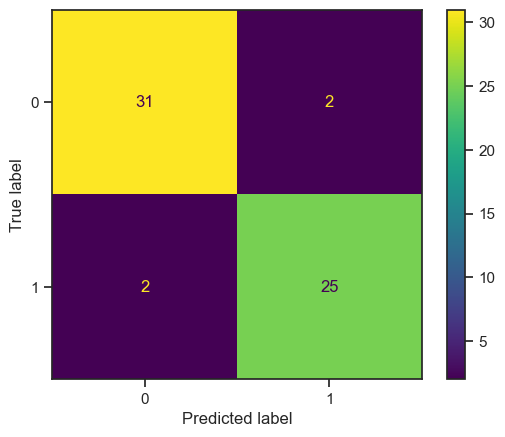

In [38]:
sns.set(style="ticks")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(lr, x_test, y_test)
plt.show()

### KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2) 
knn.fit(x_train, y_train)
y_train_pred1 = knn.predict(x_train)
y_test_pred1 = knn.predict(x_test)

In [40]:
print(classification_report(y_train_pred1,y_train))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88       162
           1       0.68      1.00      0.81        75

    accuracy                           0.85       237
   macro avg       0.84      0.89      0.84       237
weighted avg       0.90      0.85      0.86       237



In [41]:
print(classification_report(y_test_pred1,y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89        37
           1       0.78      0.91      0.84        23

    accuracy                           0.87        60
   macro avg       0.86      0.88      0.86        60
weighted avg       0.88      0.87      0.87        60



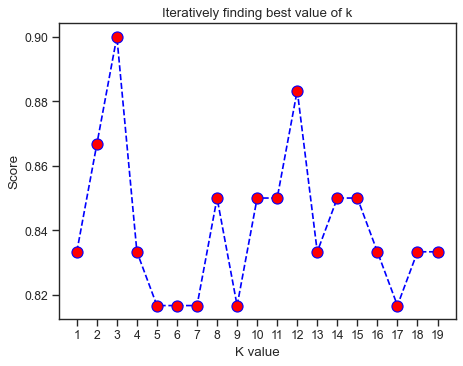

Maximum KNN Test Accuracy is 90.00% at K = 3


In [42]:
# try to find best k value
scoreList = []
for i in range(1, 20):
    knn1 = KNeighborsClassifier(n_neighbors=i)  # n_neighbors means k
    knn1.fit(x_train, y_train)
    scoreList.append(knn1.score(x_test, y_test))

plt.figure(dpi=80)
plt.plot(range(1, 20), scoreList,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.xticks(np.arange(1, 20, 1))
plt.title("Iteratively finding best value of k")
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

acc = max(scoreList) * 100
accuracies["KNN"] = acc
print("Maximum KNN Test Accuracy is {:.2f}%".format(acc),"at K =",scoreList.index(max(scoreList))+1)

In [43]:
knn2 = KNeighborsClassifier(n_neighbors=3) 
knn2.fit(x_train, y_train)
y_train_pred1 = knn2.predict(x_train)
y_test_pred1 = knn2.predict(x_test)

In [44]:
print(classification_report(y_train_pred1,y_train))

              precision    recall  f1-score   support

           0       0.89      0.86      0.87       132
           1       0.83      0.87      0.85       105

    accuracy                           0.86       237
   macro avg       0.86      0.86      0.86       237
weighted avg       0.86      0.86      0.86       237



In [45]:
KNN_report = (classification_report(y_test_pred1,y_test))
print(KNN_report)

classification_reports["KNN"] = KNN_report

              precision    recall  f1-score   support

           0       0.91      0.91      0.91        33
           1       0.89      0.89      0.89        27

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



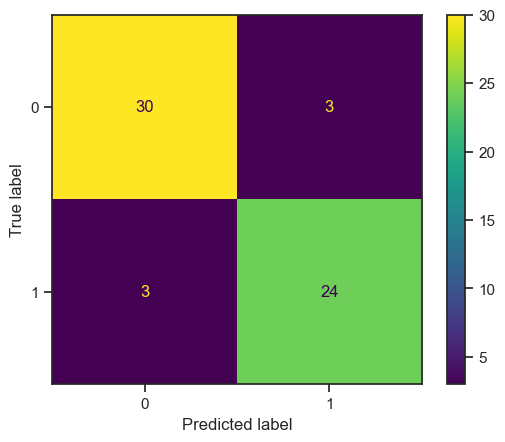

In [46]:
sns.set(style="ticks")
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn2, x_test, y_test)
plt.show()

### Naive Bayes

In [47]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(x_train, y_train)
y_train_pred2 = nb.predict(x_train)
y_test_pred2 = nb.predict(x_test)

acc = nb.score(x_test, y_test) * 100
accuracies["Naive Bayes"] = acc

In [48]:
print(classification_report(y_train_pred2,y_train))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83       130
           1       0.79      0.81      0.80       107

    accuracy                           0.82       237
   macro avg       0.82      0.82      0.82       237
weighted avg       0.82      0.82      0.82       237



In [49]:
NB_report = (classification_report(y_test_pred2,y_test))
print(NB_report)

classification_reports["Naive Bayes"] = NB_report

              precision    recall  f1-score   support

           0       0.91      0.88      0.90        34
           1       0.85      0.88      0.87        26

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



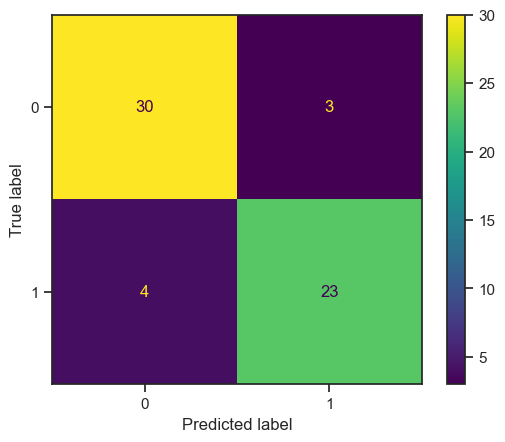

In [50]:
ConfusionMatrixDisplay.from_estimator(nb, x_test, y_test)
plt.show()

### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state = 42)
dtc.fit(x_train, y_train)

acc = dtc.score(x_test, y_test) * 100
accuracies["Decision Tree"] = acc
print("Decision Tree Test Accuracy is {:.2f}%".format(acc))

Decision Tree Test Accuracy is 78.33%


In [52]:
#hyperparameter tuning for decision tree
param_dist = {'max_depth': np.arange(1, 7),
             'max_features': np.arange(1,7) , 
              "min_samples_leaf": np.arange(1,7),
              "criterion": ["gini", "entropy", "log_loss"],
             "random_state": [42]}
tree_cv = GridSearchCV(dtc, param_dist, cv = 5)
  
tree_cv.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': array([1, 2, 3, 4, 5, 6]),
                         'max_features': array([1, 2, 3, 4, 5, 6]),
                         'min_samples_leaf': array([1, 2, 3, 4, 5, 6]),
                         'random_state': [42]})

In [53]:
(tree_cv.best_params_)

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 1,
 'min_samples_leaf': 1,
 'random_state': 42}

In [54]:
dtc1 = DecisionTreeClassifier(criterion= 'entropy',
                              max_depth= 3,
                              max_features= 1,
                              min_samples_leaf= 1, 
                              random_state= 42)
dtc1.fit(x_train, y_train)
y_train_pred3 = dtc1.predict(x_train)
y_test_pred3 = dtc1.predict(x_test)

acc = dtc1.score(x_test, y_test) * 100
accuracies["Decision Tree"] = acc
print("Decision Tree Test Accuracy is {:.2f}%".format(acc))

Decision Tree Test Accuracy is 81.67%


In [55]:
print(classification_report(y_train_pred3,y_train))

              precision    recall  f1-score   support

           0       0.90      0.70      0.78       164
           1       0.55      0.82      0.66        73

    accuracy                           0.73       237
   macro avg       0.72      0.76      0.72       237
weighted avg       0.79      0.73      0.74       237



In [56]:
DT_report = (classification_report(y_test_pred3,y_test))
print(DT_report)

classification_reports["Decision Tree"] = DT_report

              precision    recall  f1-score   support

           0       0.91      0.79      0.85        38
           1       0.70      0.86      0.78        22

    accuracy                           0.82        60
   macro avg       0.81      0.83      0.81        60
weighted avg       0.83      0.82      0.82        60



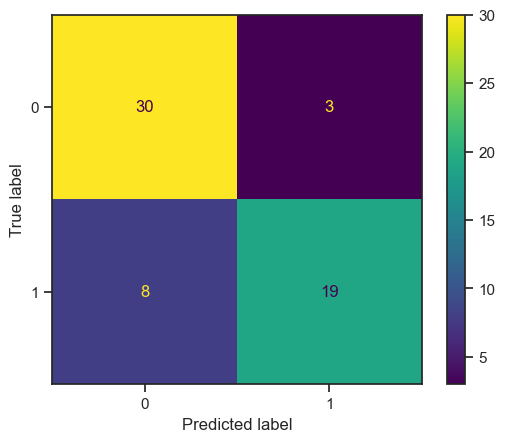

In [57]:
ConfusionMatrixDisplay.from_estimator(dtc1, x_test, y_test)
plt.show()

### SVM

In [58]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
y_test_pred4 = svm.predict(x_test)

acc = svm.score(x_test, y_test) * 100
print(acc)

88.33333333333333


In [59]:
print(classification_report(y_test_pred4,y_test))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.93      0.83      0.88        30

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



In [60]:
#hyperparameter tuning for SVM
param_tuned= {'C': [0.1,1,5,10,100], 
              'gamma': [1,0.1,0.01,0.001,0.005,0.0001, 0.0005],
              'kernel': ['poly','rbf', 'sigmoid','linear']}
 
grid = GridSearchCV(svm, param_tuned, scoring='accuracy', cv = 5)
 
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 5, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.005, 0.0001, 0.0005],
                         'kernel': ['poly', 'rbf', 'sigmoid', 'linear']},
             scoring='accuracy')

In [61]:
print(grid.best_params_)

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


In [62]:
svm1 = SVC(C=1, gamma= 0.1, kernel= 'rbf')
svm1.fit(x_train, y_train)
y_train_pred4 = svm1.predict(x_train)
y_test_pred4 = svm1.predict(x_test)

acc = svm1.score(x_test, y_test) * 100
accuracies["SVM"] = acc

print(acc)

88.33333333333333


In [63]:
print(classification_report(y_train_pred4,y_train))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89       127
           1       0.87      0.87      0.87       110

    accuracy                           0.88       237
   macro avg       0.88      0.88      0.88       237
weighted avg       0.88      0.88      0.88       237



In [64]:
SVM_report = (classification_report(y_test_pred4,y_test))
print(SVM_report)

classification_reports["Support Vector Machine"] = SVM_report

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.93      0.83      0.88        30

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



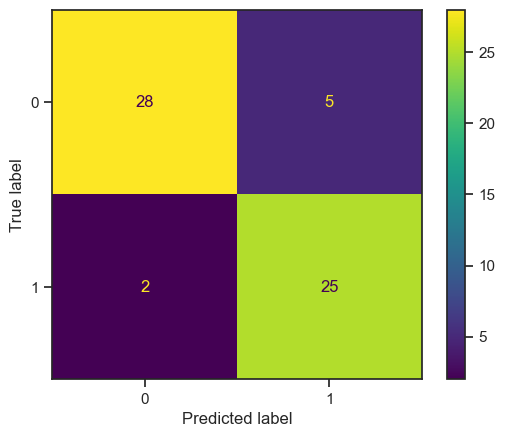

In [65]:
ConfusionMatrixDisplay.from_estimator(svm1, x_test, y_test)
plt.show()

### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train, y_train)
y_test_pred5 = rf.predict(x_test)

In [67]:
print(classification_report(y_test_pred5,y_test))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        32
           1       0.89      0.86      0.87        28

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



In [68]:
#hyperparameter tuning for Random forest
param_tuned = {'n_estimators': [40, 50, 60, 70, 80, 90, 100, 110, 120],
               'max_features': ['log2','sqrt'],
               'criterion': ['gini', 'entropy', 'log_loss'],
               'random_state': [42]}
rscv_Rf = GridSearchCV(rf, 
                             param_tuned, 
                             cv=5,
                             verbose=True,
                             n_jobs=-1)

In [69]:
rscv_results = rscv_Rf.fit(x_train, y_train)
rscv_results.best_score_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


0.8143617021276596

In [70]:
rscv_results.best_params_

{'criterion': 'entropy',
 'max_features': 'log2',
 'n_estimators': 110,
 'random_state': 42}

In [71]:
rf1 = RandomForestClassifier(criterion = 'entropy', max_features= 'log2', n_estimators= 110, random_state = 42)
rf1.fit(x_train, y_train)
y_train_pred5 = rf1.predict(x_train)
y_test_pred5 = rf1.predict(x_test)

acc = rf1.score(x_test, y_test) * 100
accuracies["RF"] = acc

In [72]:
print(classification_report(y_train_pred5,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       127
           1       1.00      1.00      1.00       110

    accuracy                           1.00       237
   macro avg       1.00      1.00      1.00       237
weighted avg       1.00      1.00      1.00       237



In [73]:
RF_report = (classification_report(y_test_pred5,y_test))
print(RF_report)

classification_reports["Random Forest"] = RF_report

              precision    recall  f1-score   support

           0       0.85      0.93      0.89        30
           1       0.93      0.83      0.88        30

    accuracy                           0.88        60
   macro avg       0.89      0.88      0.88        60
weighted avg       0.89      0.88      0.88        60



<Figure size 768x576 with 0 Axes>

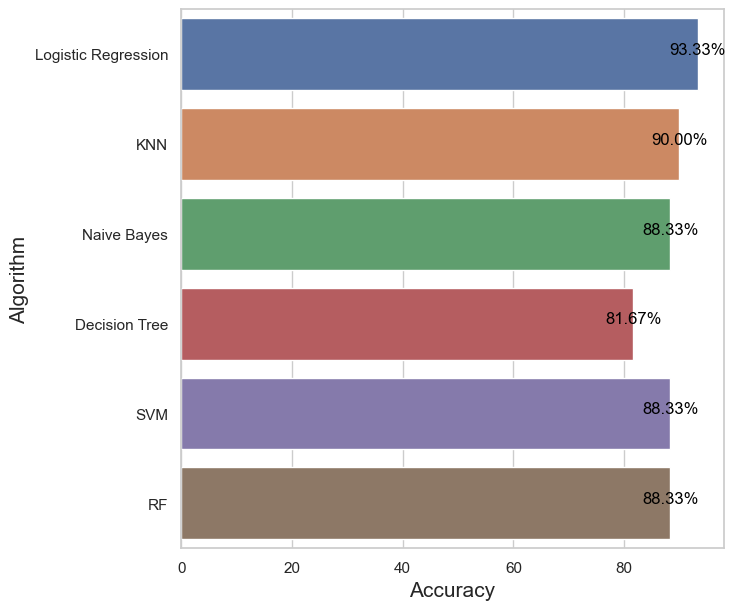

In [74]:
sns.set_style("whitegrid")
plt.figure(dpi=120)
plt.figure(figsize=(7, 7))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("Algorithm",fontsize=15)
plt.xlabel("Accuracy",fontsize=15)
g = sns.barplot(y=list(accuracies.keys()), x=list(accuracies.values()), orient="h")
i = 0
for algorithm, accuracy in accuracies.items():
    g.text(accuracy, i, "{0:.2f}%".format(accuracy), color="black", ha="center")
    i += 1
plt.show()

In [75]:
import pandas as pd

df = pd.DataFrame.from_dict(classification_reports, orient='index')

from tabulate import tabulate

print(tabulate(df, headers='keys', tablefmt='fancy_grid'))


╒════════════════════════╤═══════════════════════════════════════════════════════╕
│                        │ 0                                                     │
╞════════════════════════╪═══════════════════════════════════════════════════════╡
│ Logistic Regression    │ precision    recall  f1-score   support               │
│                        │                                                       │
│                        │            0       0.94      0.94      0.94        33 │
│                        │            1       0.93      0.93      0.93        27 │
│                        │                                                       │
│                        │     accuracy                           0.93        60 │
│                        │    macro avg       0.93      0.93      0.93        60 │
│                        │ weighted avg       0.93      0.93      0.93        60 │
├────────────────────────┼───────────────────────────────────────────────────────┤
│ KN

### Recreate best model in Keras to use for TensorFlowJS

In [79]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(units=1, activation='sigmoid', input_shape=(x_train.shape[1],))
])

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test), verbose=1)
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_accuracy * 100:.2f}%')

Epoch 1/50
8/8 [==============================] - 1s 28ms/step - loss: 0.9001 - accuracy: 0.4177 - val_loss: 0.8372 - val_accuracy: 0.4667
Epoch 2/50
8/8 [==============================] - 0s 5ms/step - loss: 0.8786 - accuracy: 0.4262 - val_loss: 0.8105 - val_accuracy: 0.4667
Epoch 3/50
8/8 [==============================] - 0s 5ms/step - loss: 0.8582 - accuracy: 0.4557 - val_loss: 0.7855 - val_accuracy: 0.4833
Epoch 4/50
8/8 [==============================] - 0s 5ms/step - loss: 0.8383 - accuracy: 0.4515 - val_loss: 0.7630 - val_accuracy: 0.5000
Epoch 5/50
8/8 [==============================] - 0s 5ms/step - loss: 0.8213 - accuracy: 0.4557 - val_loss: 0.7419 - val_accuracy: 0.5333
Epoch 6/50
8/8 [==============================] - 0s 5ms/step - loss: 0.8049 - accuracy: 0.4726 - val_loss: 0.7224 - val_accuracy: 0.5500
Epoch 7/50
8/8 [==============================] - 0s 5ms/step - loss: 0.7898 - accuracy: 0.4852 - val_loss: 0.7034 - val_accuracy: 0.5667
Epoch 8/50
8/8 [=================